In [1]:
import settings
from tqdm import tqdm
import json
import os
from process_sentinel2 import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA_PATH = settings.data_path
DATE_FORMAT = '%Y-%m-%d'
START_DATE = '2016-12-21'
END_DATE = '2021-04-20'
MASK_PATH = "water_mask.json"

In [3]:
sample_day = DayData(os.path.join("sample_data", "2021-01-25_new_acolite"), rhot=True)

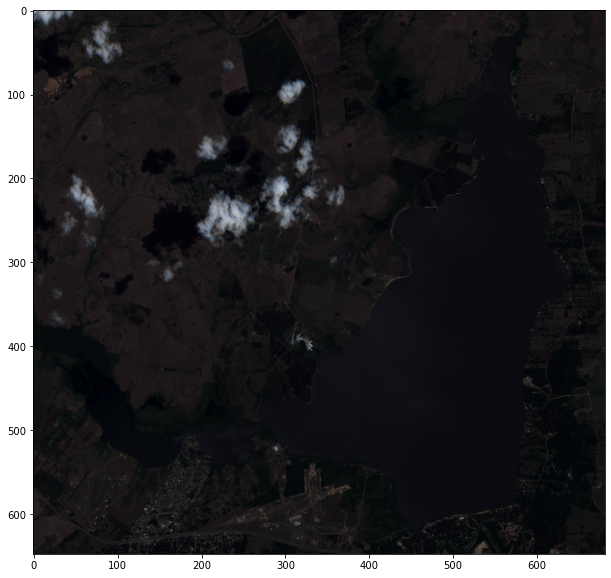

In [4]:
fig = plt.figure(figsize=(20,10))
plt.imshow(sample_day.rgb)
plt.show()

In [22]:
from s2cloudless import S2PixelCloudDetector, CloudMaskRequest, get_s2_evalscript


cloud_detector = S2PixelCloudDetector(
    threshold=0.4,
    average_over=4,
    dilation_size=2,
    all_bands=False
)

In [23]:
bands_for_cloud_detector = ["B1", "B2", "B4", "B5", "B8", "B8A", "B9", "B10", "B11", "B12"]
cloud_detector_input = np.zeros((sample_day.rgb.shape[0], sample_day.rgb.shape[1], len(bands_for_cloud_detector)))
for i, band in enumerate(bands_for_cloud_detector):
    cloud_detector_input[:, :, i] = sample_day.bands_rhot[band]

In [24]:
%%time
cloud_mask = cloud_detector.get_cloud_masks(cloud_detector_input)

CPU times: user 16.7 s, sys: 17.3 ms, total: 16.7 s
Wall time: 8.84 s


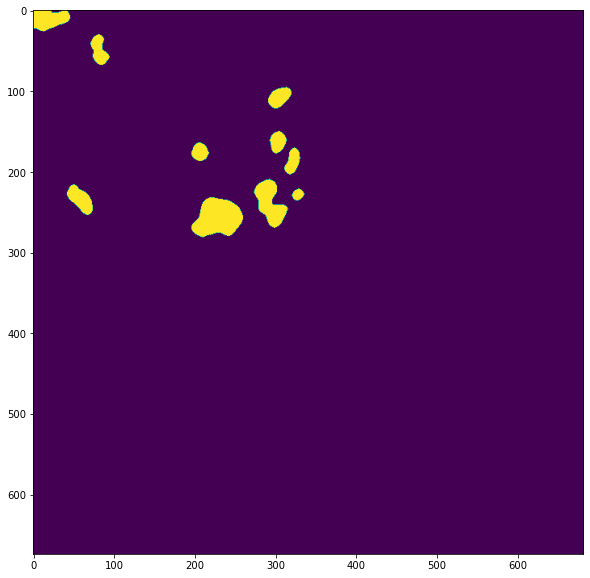

In [25]:
fig = plt.figure(figsize=(20,10))
plt.imshow(cloud_mask)
plt.show()

In [5]:
fig = plt.figure(figsize=(20,10))
plt.imshow(sample_day.compute_cloud_mask())
plt.show()

NameError: name 'sample_day' is not defined

<Figure size 1440x720 with 0 Axes>